Sean Kelly
11/5/20 
HW16

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.extensions import C4XGate

Clauses:
---
(a OR b) AND (NOT a OR c) AND (NOT b OR NOT c) AND (a OR c)

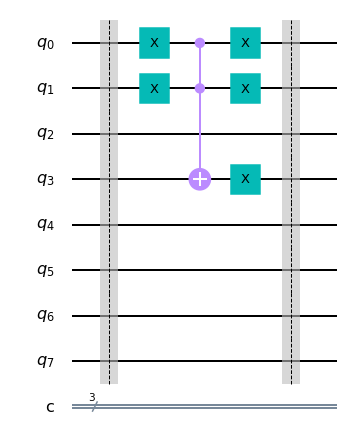

In [2]:
"""(a V b)"""
clause_1 = QuantumCircuit(8,3)
clause_1.barrier()

clause_1.x(0)
clause_1.x(1)
clause_1.ccx(0,1,3)
clause_1.x(0)
clause_1.x(1)

clause_1.x(3)

clause_1.barrier()
clause_1.draw('mpl')

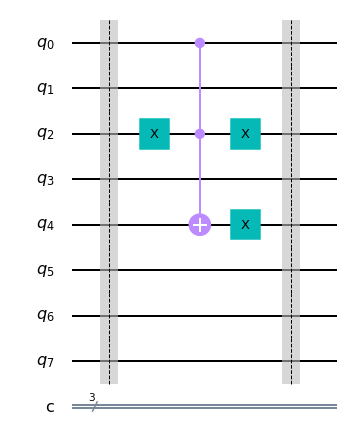

In [3]:
"""(¬a V c)"""
clause_2 = QuantumCircuit(8,3)
clause_2.barrier()

clause_2.x(2)
clause_2.ccx(0,2,4)
clause_2.x(2)

clause_2.x(4)

clause_2.barrier()
clause_2.draw('mpl')

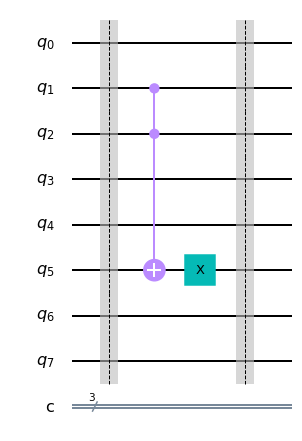

In [4]:
"""(¬b V ¬c)"""
clause_3 = QuantumCircuit(8,3)
clause_3.barrier()

clause_3.ccx(1,2,5)

clause_3.x(5)

clause_3.barrier()
clause_3.draw('mpl')

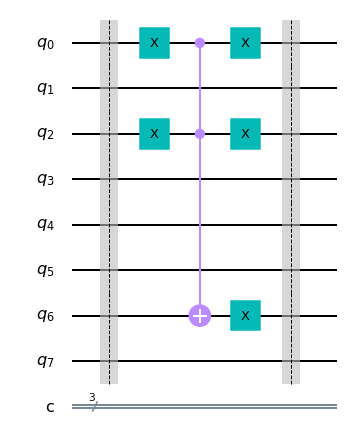

In [5]:
"""(a V c)"""
clause_4 = QuantumCircuit(8,3)
clause_4.barrier()

clause_4.x(0)
clause_4.x(2)
clause_4.ccx(0,2,6)
clause_4.x(0)
clause_4.x(2)

clause_4.x(6)

clause_4.barrier()
clause_4.draw('mpl')

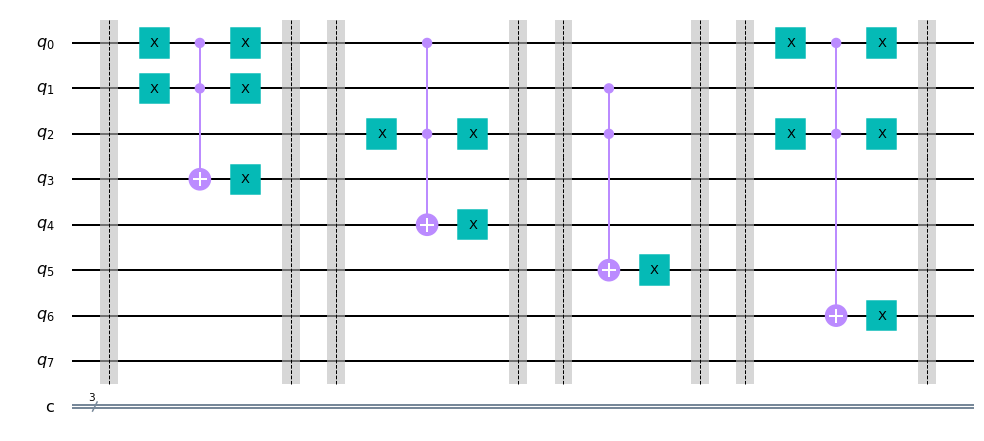

In [6]:
"""[ (a V b) ∧ (¬a V c) ∧ (¬b V ¬c) ∧ (a V c) ]"""
clauses = QuantumCircuit(8,3)
clauses = clause_1 + clause_2 + clause_3 + clause_4

clauses.draw('mpl')

Oracle:
---

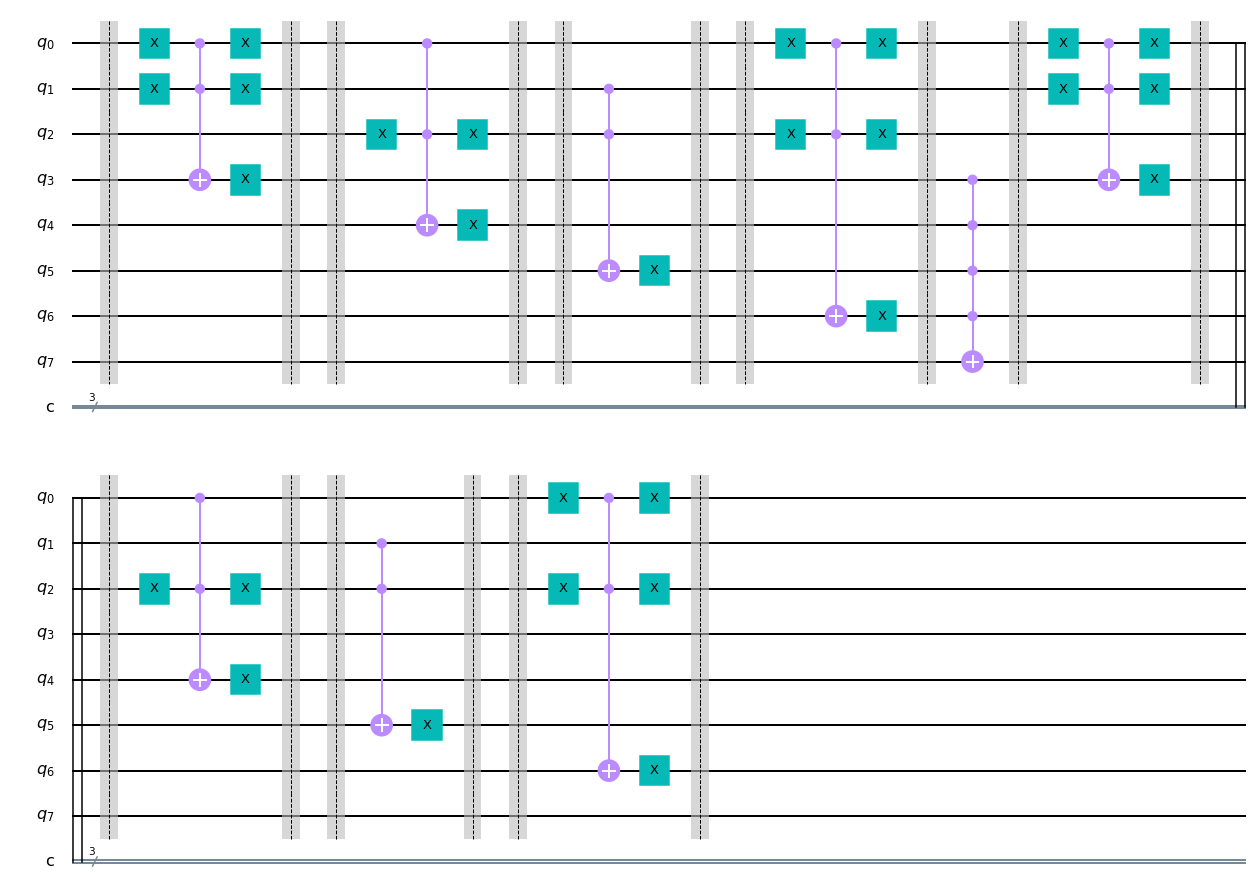

In [7]:
"""Oracle"""
oracle = QuantumCircuit(8,3)

oracle = oracle + clauses
oracle.append(C4XGate(), [3,4,5,6,7])
oracle = oracle + clauses

oracle.draw('mpl')

Phase:
---

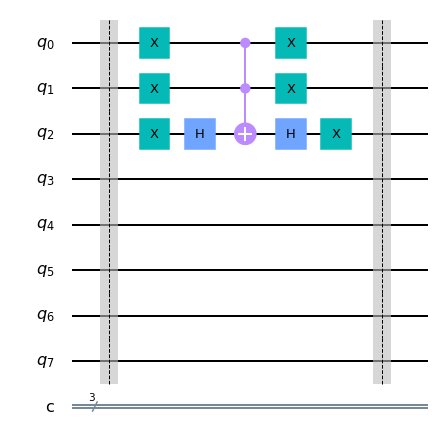

In [8]:
"""Phase"""
phase = QuantumCircuit(8,3)
phase.barrier()

phase.x(2)
phase.h(2)

phase.x(0)
phase.x(1)
phase.ccx(0,1,2)
phase.x(0)
phase.x(1)

phase.h(2)
phase.x(2)

phase.barrier()
phase.draw('mpl')

Grover Iterator:
---

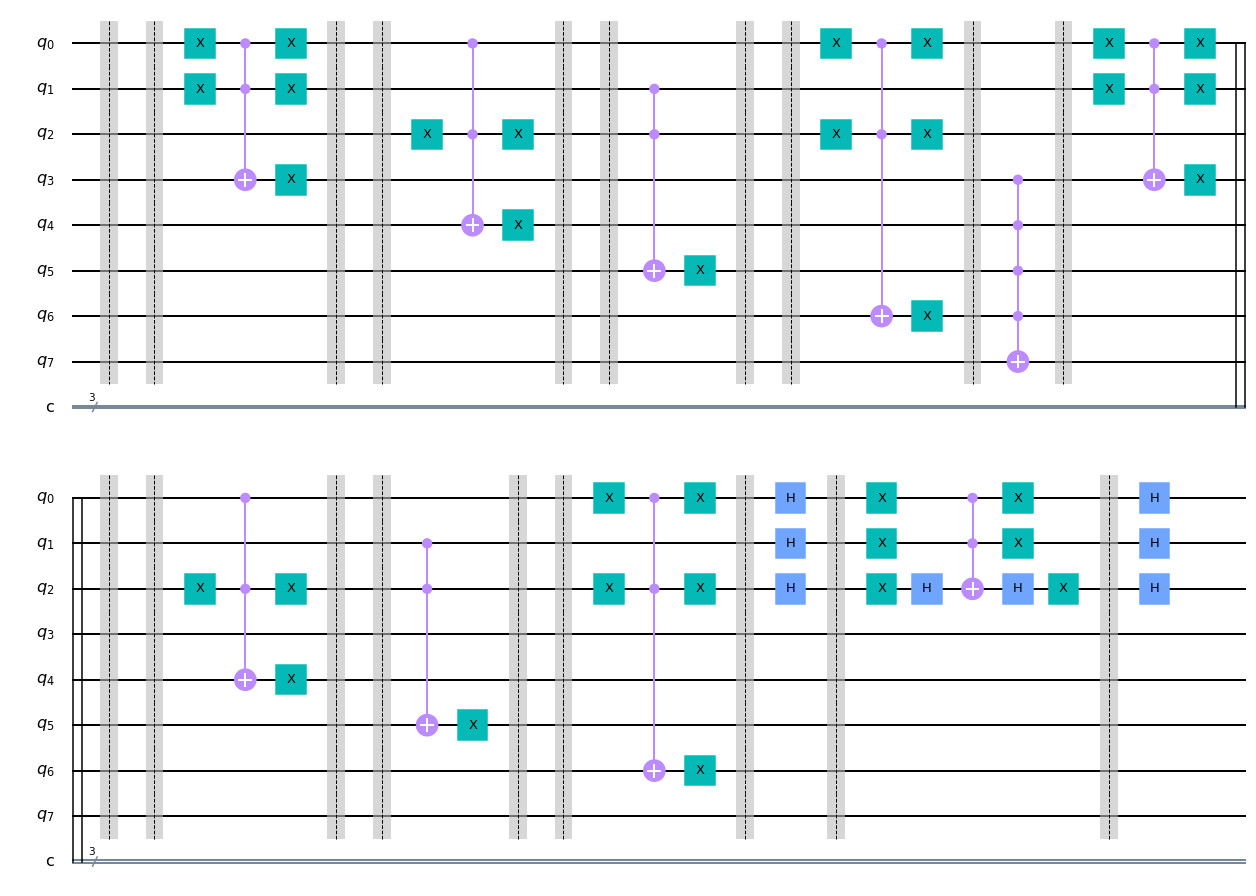

In [9]:
Grover = QuantumCircuit(8,3)
Grover.barrier()

Grover = Grover + oracle

Grover.h(0)
Grover.h(1)
Grover.h(2)

Grover = Grover + phase

Grover.h(0)
Grover.h(1)
Grover.h(2)

Grover.draw('mpl')

Complete SAT Circuit:
---

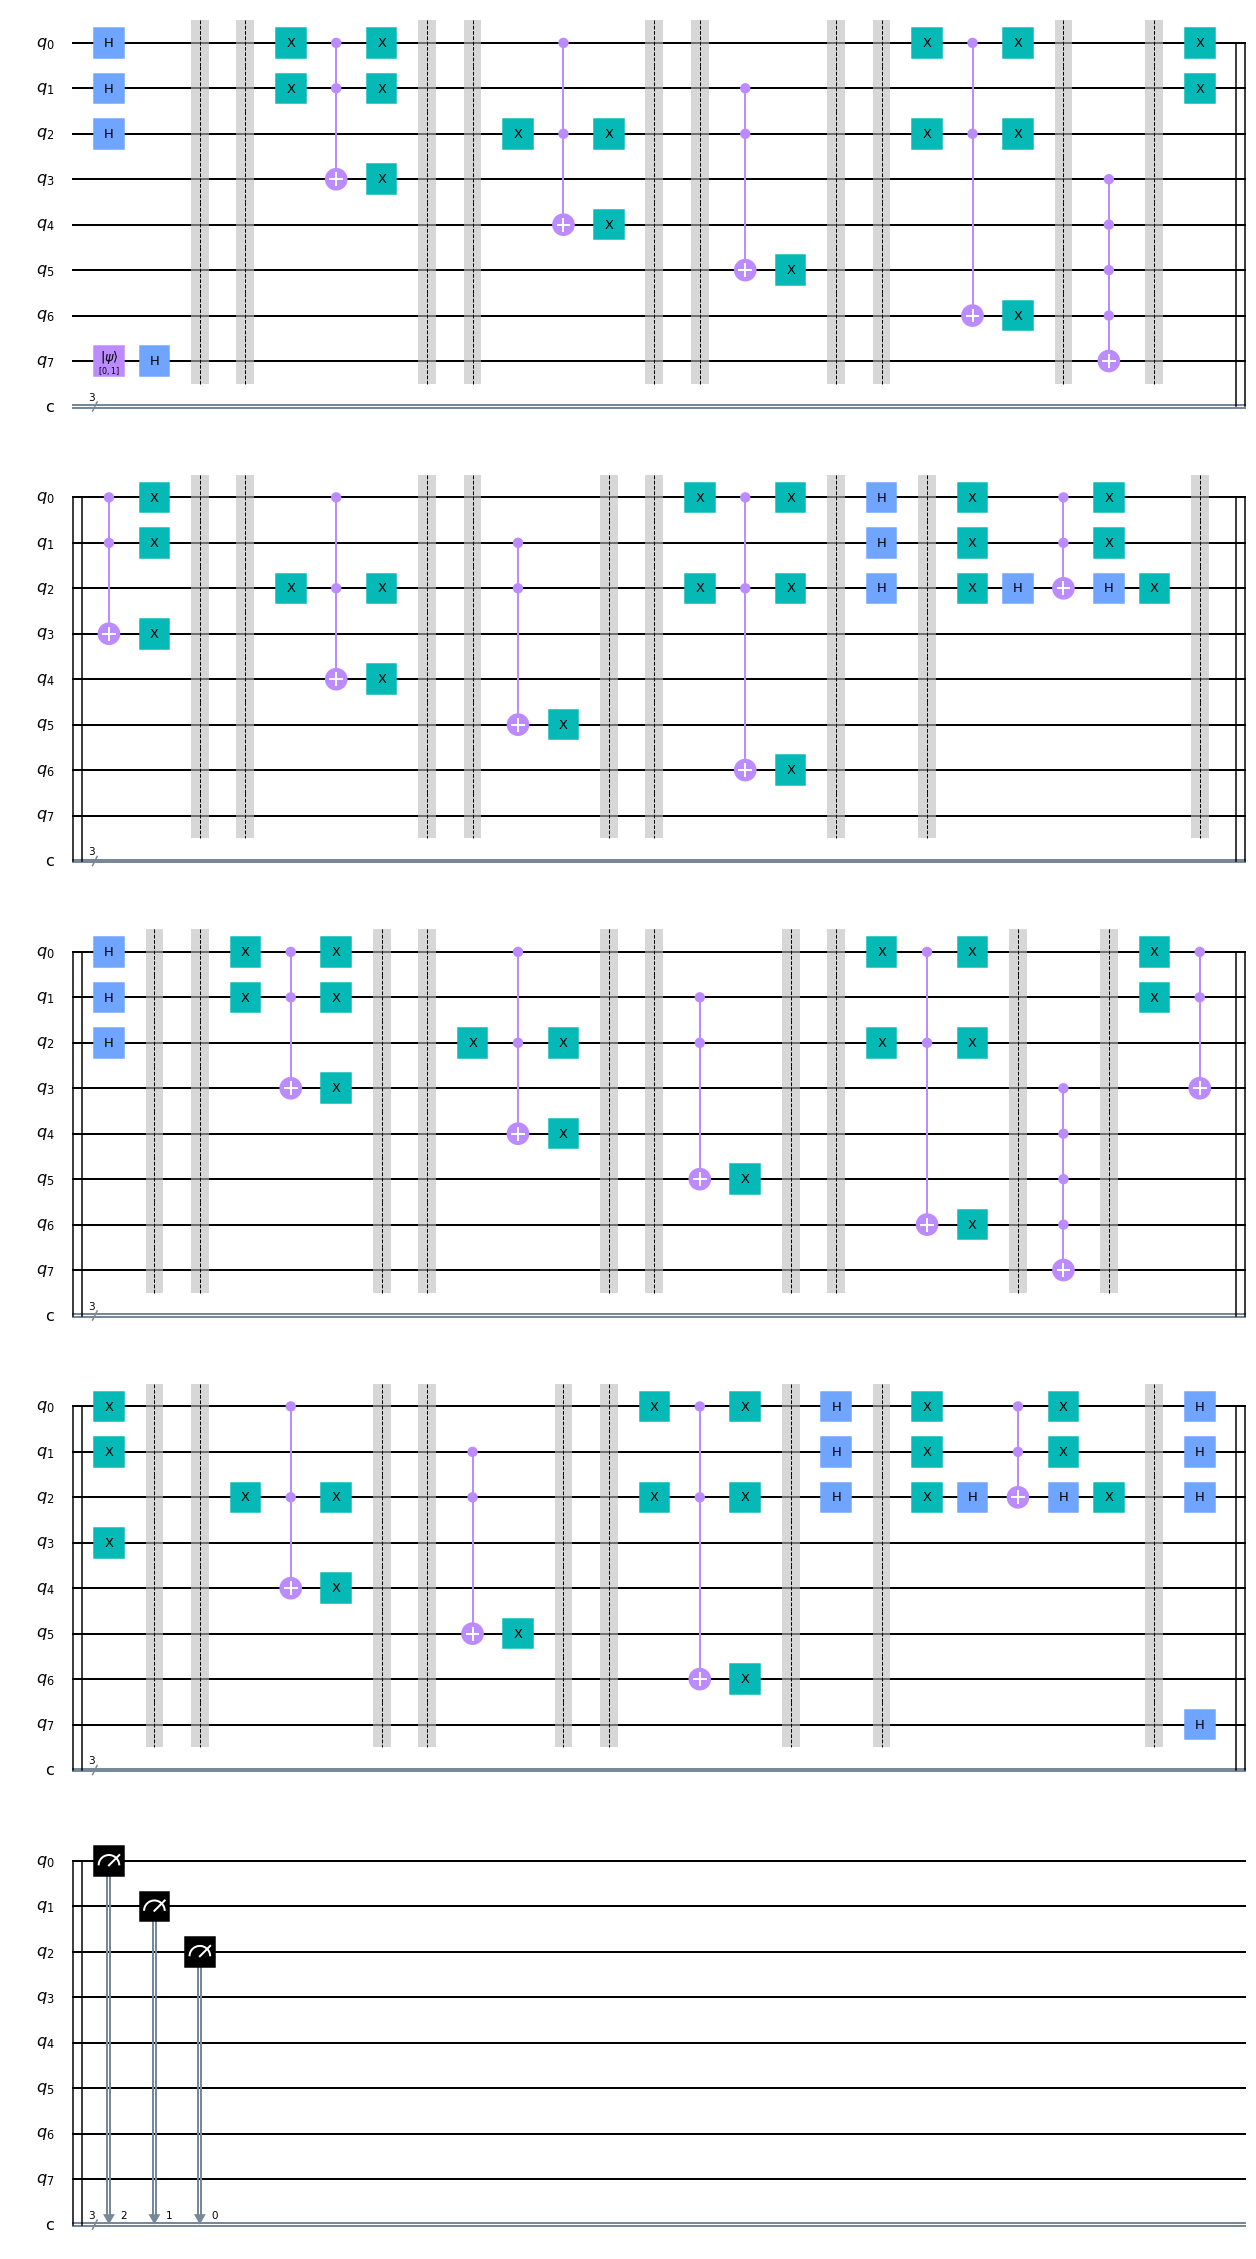

In [10]:
SAT_circ = QuantumCircuit(8,3)

SAT_circ.initialize([0,1],7) #initializes work qubit to the 1 state

SAT_circ.h(0)
SAT_circ.h(1)
SAT_circ.h(2)
SAT_circ.h(7)

optimal_g_iterations = 2
for itr in range(optimal_g_iterations):
    SAT_circ = SAT_circ + Grover
    
SAT_circ.measure(0,2)
SAT_circ.measure(1,1)
SAT_circ.measure(2,0)
SAT_circ.h(7)

SAT_circ.draw('mpl')

Measurement:
---

{'000': 5, '001': 13, '010': 5, '011': 4, '100': 14, '101': 944, '110': 8, '111': 7}


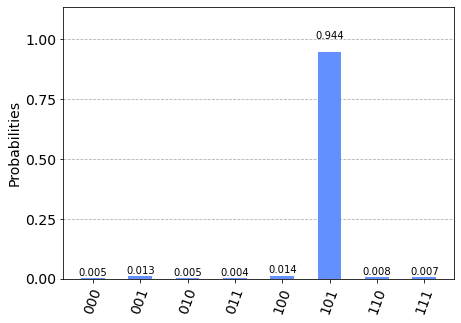

In [11]:
sim = Aer.get_backend('qasm_simulator')
res = execute(SAT_circ, sim, shots = 1000).result()
print(res.get_counts())
plot_histogram(res.get_counts())